In [125]:
import numpy as np
import pandas as pd
from datetime import datetime

In [126]:
df = pd.read_csv('sphist.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
Date         16590 non-null datetime64[ns]
Open         16590 non-null float64
High         16590 non-null float64
Low          16590 non-null float64
Close        16590 non-null float64
Volume       16590 non-null float64
Adj Close    16590 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.3 KB


In [128]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [129]:
# creating rolling mean features

price = df['Close']
roll_mean_5 = pd.Series(price.rolling(window = 5, min_periods=5).mean().shift(1),
                      name = 'roll_mean_5')

roll_mean_20 = pd.Series(price.rolling(window = 20, min_periods=20).mean().shift(1),
                      name = 'roll_mean_20')

roll_mean_200 = pd.Series(price.rolling(window = 200, min_periods=200).mean().shift(1),
                      name = 'roll_mean_200')

roll_std_5 = pd.Series(price.rolling(window = 5, min_periods=5).std().shift(1),
                      name = 'roll_std_5')

roll_std_20 = pd.Series(price.rolling(window = 20, min_periods=20).std().shift(1),
                      name = 'roll_std_20')

roll_std_200 = pd.Series(price.rolling(window = 200, min_periods=200).std().shift(1),
                      name = 'roll_std_200')

# shift is needed to have the mean for 5 previous days, excluding current one. In other words
# we calculate the mean from 01/01 to 05/01 and then shift the index to allocate this value to 06/01.

In [130]:
df = pd.concat([df, roll_mean_5, roll_mean_20, roll_mean_200, roll_std_5, roll_std_20, roll_std_200], axis=1)

In [131]:
# more features

df['ratio_mean_5_200'] = roll_mean_5 / roll_mean_200
df['ratio_std_5_200'] = roll_std_5 / roll_std_200

In [98]:
# dropping NAs
df = df.dropna(axis=0)

In [100]:
# splitting to train / test

train = df[df['Date'] < datetime(2013,1,1)]
test = df[df['Date'] >= datetime(2013,1,1)]

In [102]:
test.head()

,Date,Open,High,Low,Close,Volume,Adj Close,roll_mean_5,roll_mean_20,roll_mean_200,roll_std_5,roll_std_20,roll_std_200,ratio_mean_5_200,ratio_std_5_200
15851,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1422.285492,1390.375449,9.820801,11.789673,42.942903,1.020330,0.228694
15852,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1424.933496,1390.674549,22.261321,14.413044,43.235802,1.025254,0.514882
15853,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1427.549493,1390.950549,26.274326,15.688023,43.497778,1.030735,0.604038
15854,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1430.408990,1391.234149,27.945242,17.310877,43.804784,1.037479,0.637950
15855,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1432.806494,1391.515999,16.453319,18.207181,44.077663,1.045815,0.373280


In [142]:
# training a simple model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()

features = ['roll_mean_5', 'roll_mean_20', 'roll_mean_200', 
            'roll_std_5', 'roll_std_20', 'roll_std_200', 
            'ratio_mean_5_200', 'ratio_std_5_200']

# features = ['roll_mean_5']
target = 'Close'

model.fit(train[features], train[target])
test_pred = model.predict(test[features])

mae = mean_absolute_error(test[target], test_pred)
print(mae)

16.004136969584103

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

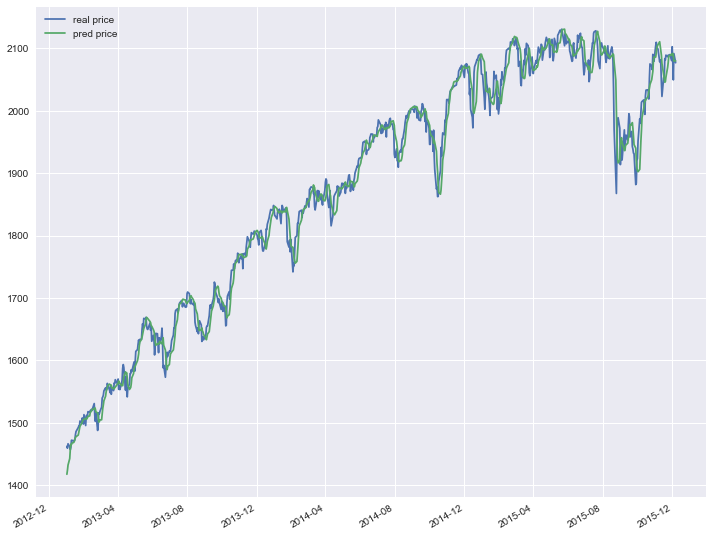

In [159]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot(test['Date'],
        test[target], label = 'real price')
ax.plot(test['Date'],
        test_pred, label = 'pred price')
fig.autofmt_xdate()
plt.legend()
plt.show()